C:\Users\aksha\AppData\Local\Temp\ipykernel_21492\4110129815.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


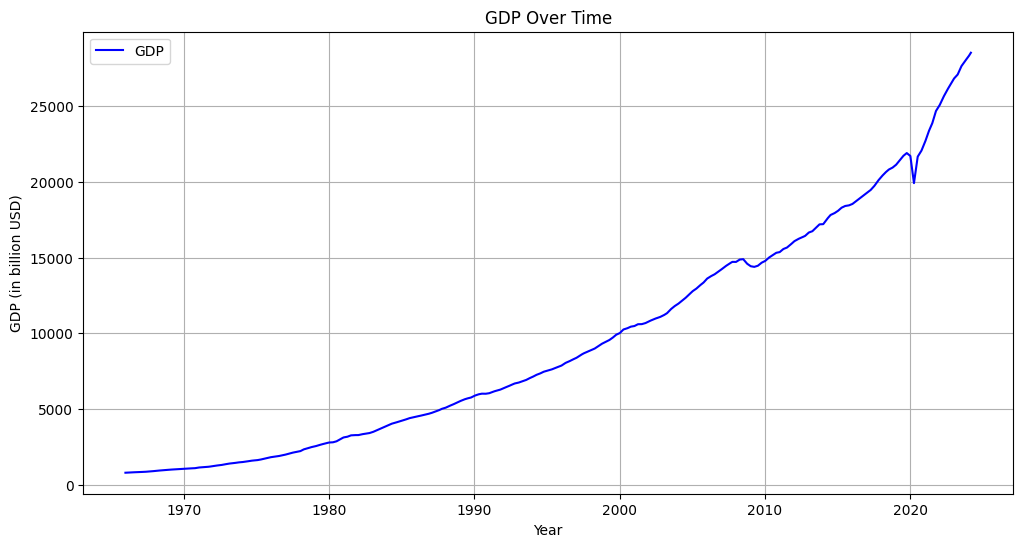

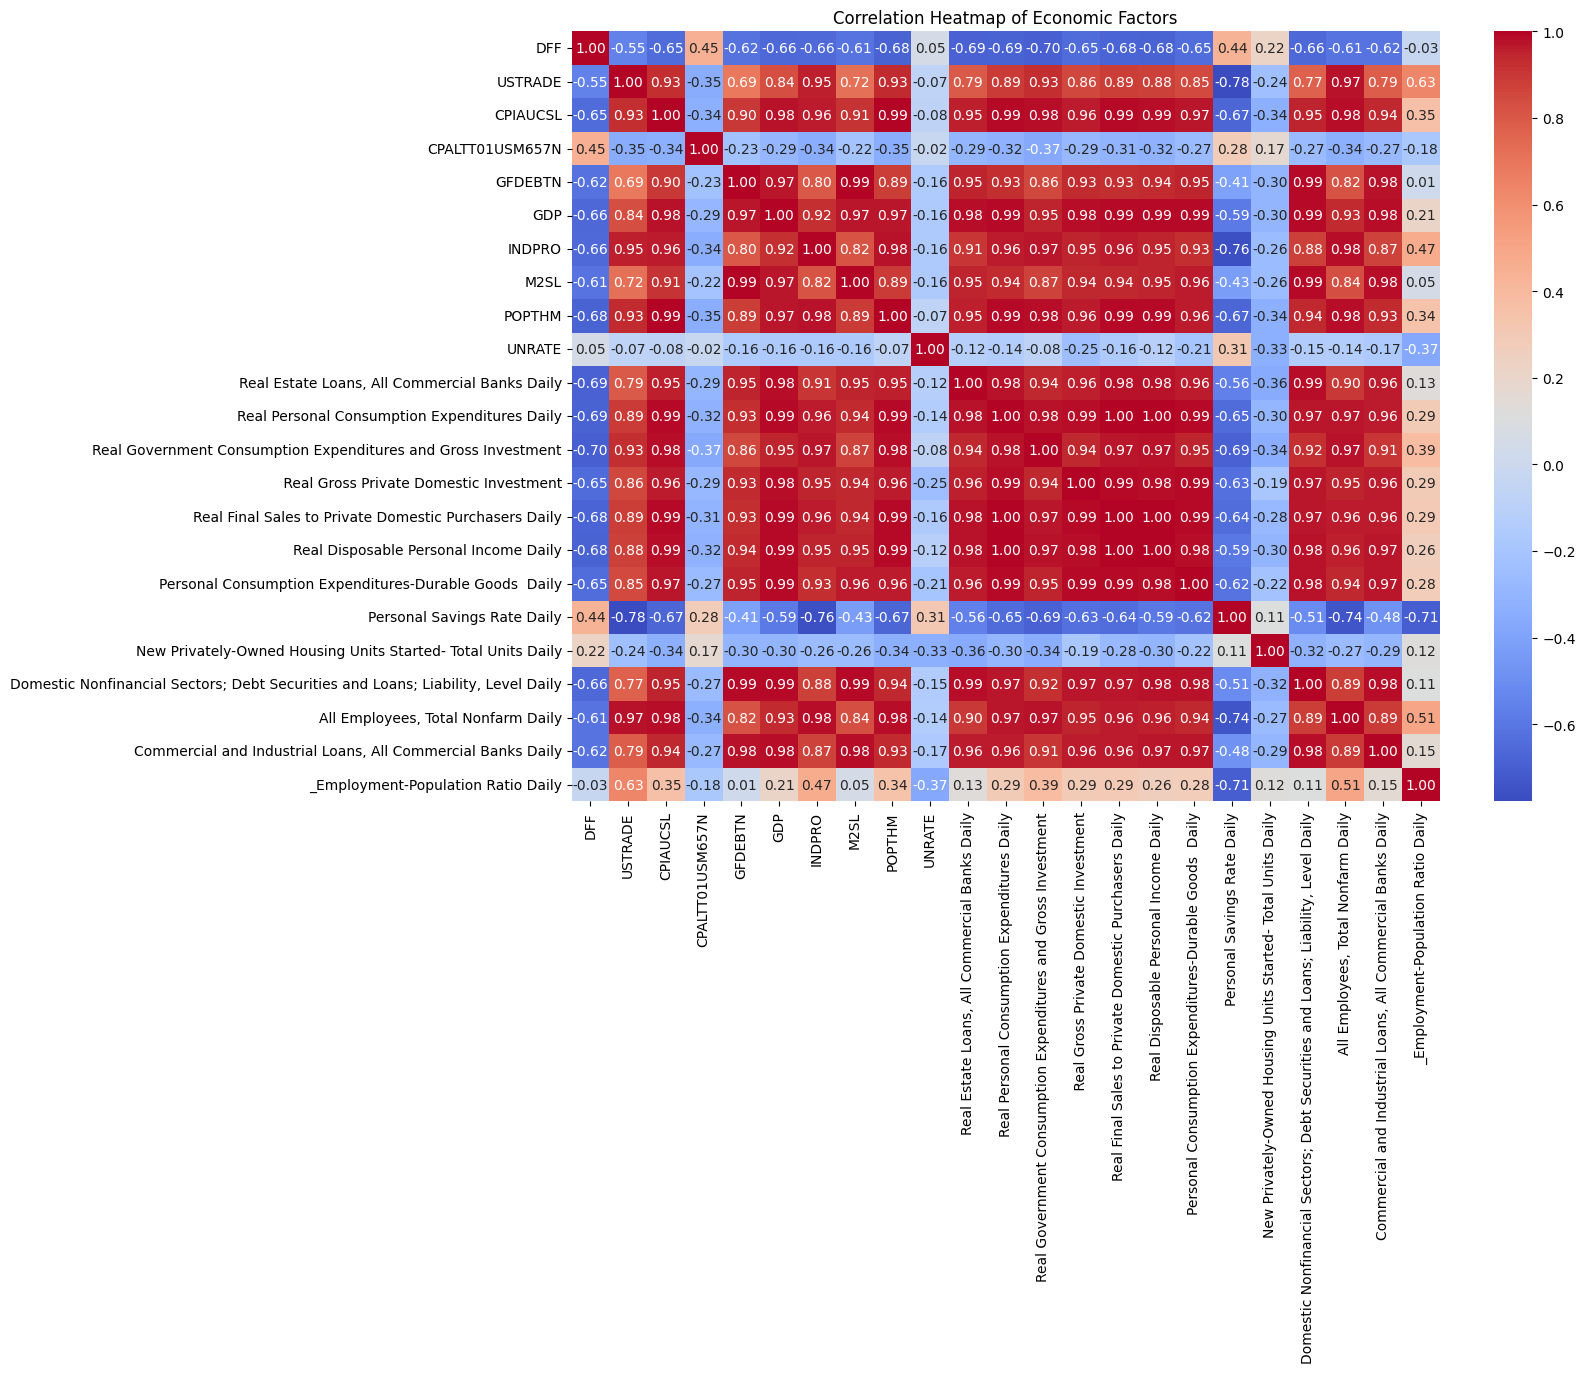

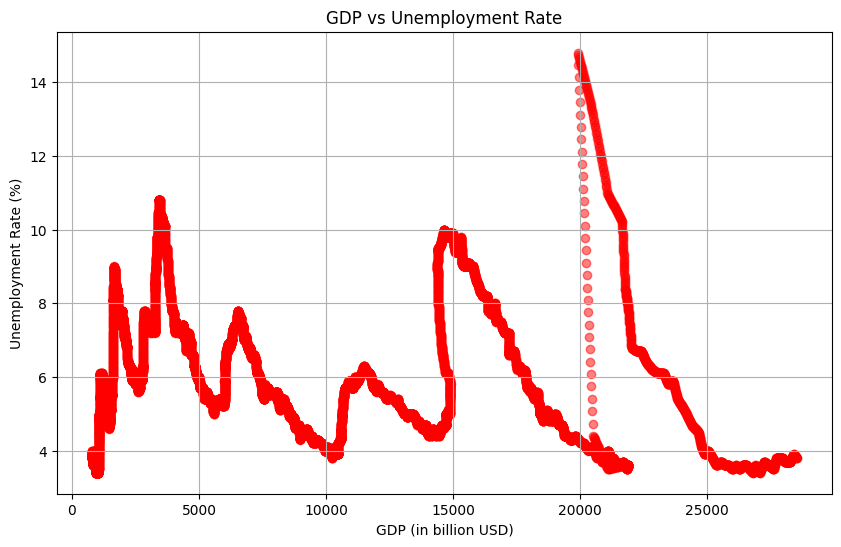

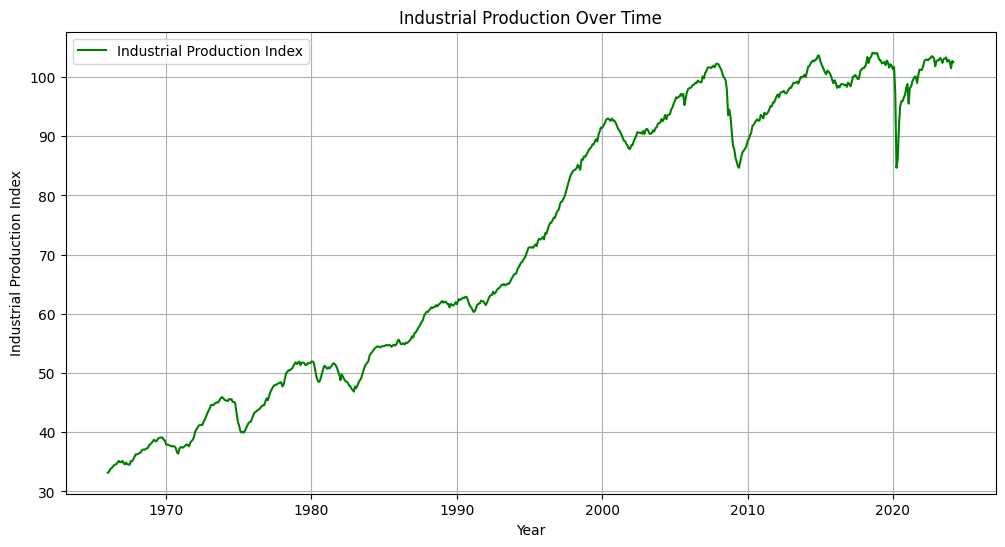

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'Linear1.csv'
data = pd.read_csv(file_path)
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
data.dropna(axis=1, how='all', inplace=True)
data.fillna(method='ffill', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['GDP'], label='GDP', color='blue')
plt.title('GDP Over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in billion USD)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Economic Factors')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['GDP'], data['UNRATE'], alpha=0.5, color='red')
plt.title('GDP vs Unemployment Rate')
plt.xlabel('GDP (in billion USD)')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data['INDPRO'], label='Industrial Production Index', color='green')
plt.title('Industrial Production Over Time')
plt.xlabel('Year')
plt.ylabel('Industrial Production Index')
plt.legend()
plt.grid(True)
plt.show()


        DATE         GDP
0 1966-01-01   813.41375
1 1967-01-01   859.95625
2 1968-01-01   940.64650
3 1969-01-01  1017.61500
4 1970-01-01  1073.31050
        DATE  NYGDPMKTPCDWLD
0 1960-01-01     1364.504252
1 1961-01-01     1439.319474
2 1962-01-01     1542.844507
3 1963-01-01     1664.976959
4 1964-01-01     1827.784855


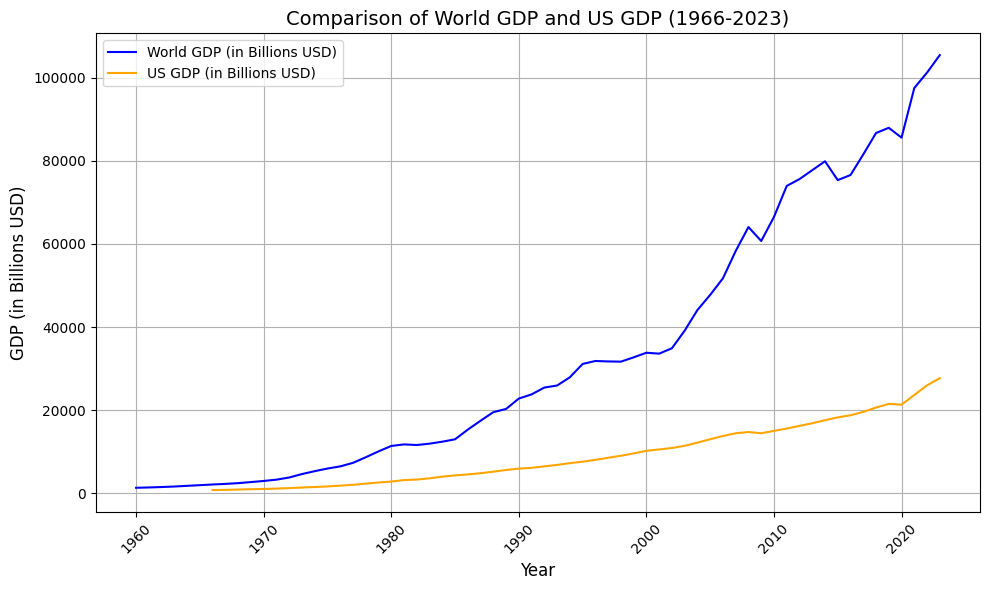

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

world_gdp_data = pd.read_csv('WORLD GDP.csv')
us_gdp_data = pd.read_csv('GDP.csv')

#Scaling the world gdp data based on the US GDP data
world_gdp_data['NYGDPMKTPCDWLD'] = [x / 1e9 for x in world_gdp_data['NYGDPMKTPCDWLD']]

world_gdp_df = pd.DataFrame(world_gdp_data)
us_gdp_df = pd.DataFrame(us_gdp_data)

world_gdp_df['DATE'] = pd.to_datetime(world_gdp_df['DATE'])
us_gdp_df['DATE'] = pd.to_datetime(us_gdp_df['DATE'])

print(us_gdp_df.head())
print(world_gdp_df.head())
merged_df = pd.merge(world_gdp_df, us_gdp_df, on='DATE', how='outer')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['DATE'], merged_df['NYGDPMKTPCDWLD'], label='World GDP (in Billions USD)', color='blue', linestyle='-')
plt.plot(merged_df['DATE'], merged_df['GDP'], label='US GDP (in Billions USD)', color='orange', linestyle='-')
plt.title('Comparison of World GDP and US GDP (1966-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in Billions USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

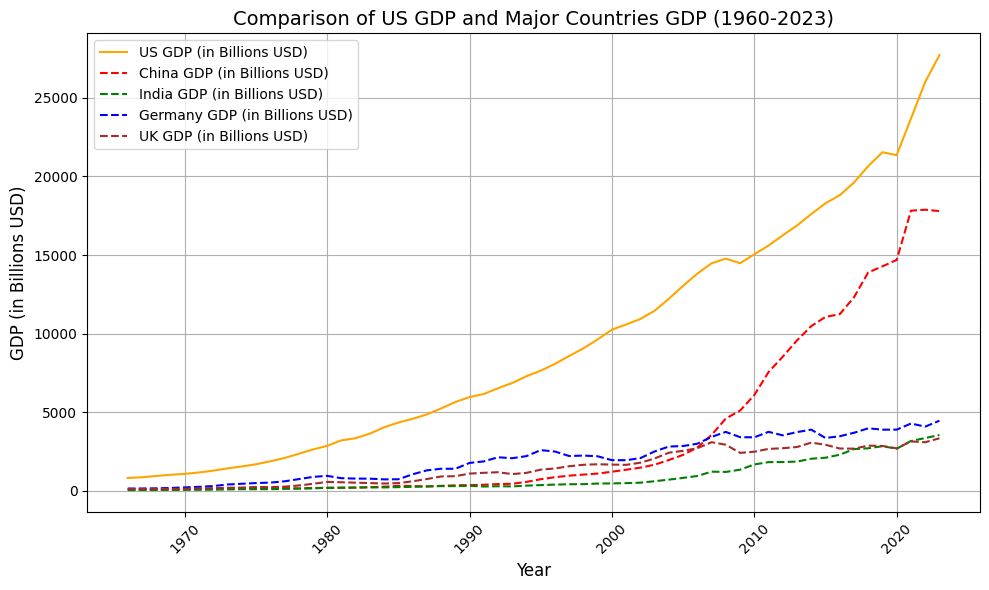

In [4]:
china_gdp_data = pd.read_csv('CHINA GDP.csv')
india_gdp_data = pd.read_csv('INDIA GDP.csv')
germany_gdp_data = pd.read_csv('GERMANY GDP.csv')
uk_gdp_data = pd.read_csv('UK GDP.csv')

# Scaling the data
china_gdp_data['GDP'] = [x / 1e9 for x in china_gdp_data['GDP']]
india_gdp_data['GDP'] = [x / 1e9 for x in india_gdp_data['GDP']]
germany_gdp_data['GDP'] = [x / 1e9 for x in germany_gdp_data['GDP']]
uk_gdp_data['GDP'] = [x / 1e9 for x in uk_gdp_data['GDP']]

# Convert 'DATE' column to datetime
china_gdp_data['DATE'] = pd.to_datetime(china_gdp_data['DATE'])
india_gdp_data['DATE'] = pd.to_datetime(india_gdp_data['DATE'])
germany_gdp_data['DATE'] = pd.to_datetime(germany_gdp_data['DATE'])
uk_gdp_data['DATE'] = pd.to_datetime(uk_gdp_data['DATE'])

merged_df = pd.merge(world_gdp_df, us_gdp_df, on='DATE', how='outer')
# Merge dataframes on 'DATE'
merged_df = pd.merge(merged_df, china_gdp_data[['DATE', 'GDP']], on='DATE', how='outer', suffixes=('', '_CHINA'))
merged_df = pd.merge(merged_df, india_gdp_data[['DATE', 'GDP']], on='DATE', how='outer', suffixes=('', '_INDIA'))
merged_df = pd.merge(merged_df, germany_gdp_data[['DATE', 'GDP']], on='DATE', how='outer', suffixes=('', '_GERMANY'))
merged_df = pd.merge(merged_df, uk_gdp_data[['DATE', 'GDP']], on='DATE', how='outer', suffixes=('', '_UK'))

# Rename columns for clarity
merged_df.rename(columns={'GDP': 'GDP_USA'}, inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df['DATE'], merged_df['GDP_USA'], label='US GDP (in Billions USD)', color='orange', linestyle='-')
plt.plot(merged_df['DATE'], merged_df['GDP_CHINA'], label='China GDP (in Billions USD)', color='red', linestyle='--')
plt.plot(merged_df['DATE'], merged_df['GDP_INDIA'], label='India GDP (in Billions USD)', color='green', linestyle='--')
plt.plot(merged_df['DATE'], merged_df['GDP_GERMANY'], label='Germany GDP (in Billions USD)', color='blue', linestyle='--')
plt.plot(merged_df['DATE'], merged_df['GDP_UK'], label='UK GDP (in Billions USD)', color='brown', linestyle='--')
plt.title('Comparison of US GDP and Major Countries GDP (1960-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP (in Billions USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
